In [7]:
import pulp

#Cream o problema de maximizare a productiei
problema= pulp.LpProblem("Maximizarea_Productiei",pulp.LpMaximize)

#Definim variabilele pentru numarul de unitati de Limonada si SUc de Fructe care vor fi produse
limonada= pulp.LpVariable("Limonada",lowBound=0,cat="Integer")
suc_fructe=pulp.LpVariable("Suc_fructe",lowBound=0,cat="Integer")

#Functia obiectiv: Maximizarea sumei de unitati de Limonada si Suc de fructe
problema += limonada + suc_fructe, "Productia_Totala"

#Constrangeri
problema += 2 * limonada + 1 * suc_fructe <=100, "Constrangere_Apa"
problema += 1 * limonada <= 50, "Constrangere_Zahar"
problema += 1 * limonada <= 30, "Constrangere_Suc_Lamaie"
problema += 2 * suc_fructe <= 40, "Constrangere_Piure_Fructe"

#Rezolvam problema
problema.solve()

#Afisam rezultatele

print(f"Numarul optim de unitati de Limonada: {pulp.value(limonada)}")
print(f"Numarul optim de unitati de suc de fructe: {pulp.value(suc_fructe)}")




Numarul optim de unitati de Limonada: 30.0
Numarul optim de unitati de suc de fructe: 20.0


Estimarea integralei prin Monte Carlo:2.6776
Integrala folosind SciPy Quad: 2.666666666666667,cu o estimare a erorii: 2.960594732333751e-14


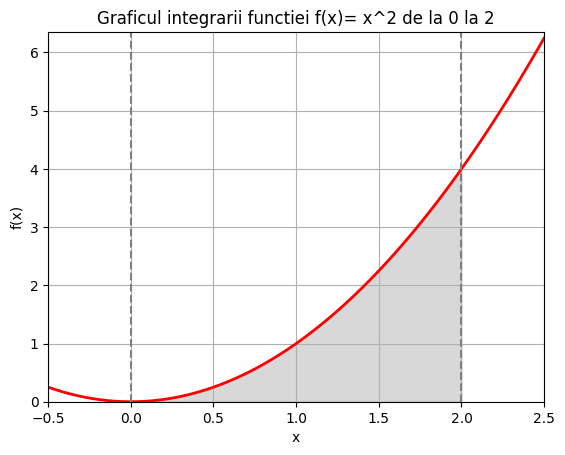

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

#Definim functia care urmeaza sa fie integrata
def f(x):
    return x**2

#Limitele de integrare
a = 0
b = 2

#Metoda Monte Carlo
def integrare_monte_carlo(f,a,b,numar_puncte=10000):
    x_aleator=np.random.uniform(a,b,numar_puncte)
    y_aleator=np.random.uniform(0,f(b),numar_puncte)

    #Puncte sub curba
    sub_curba=y_aleator < f(x_aleator)

    #Estimarea integralei
    estimare_integrala=(b-a) * f(b) * np.mean(sub_curba)
    return estimare_integrala

#Calculam integrala folosind metoda Monte Carlo
rezultat_monte_carlo=integrare_monte_carlo(f,a,b)
print(f"Estimarea integralei prin Monte Carlo:{rezultat_monte_carlo}")

#Verificam rezultatul folosind functia quad din scipy
rezultat_quad, eroare=spi.quad(f,a,b)
print(f"Integrala folosind SciPy Quad: {rezultat_quad},cu o estimare a erorii: {eroare}")

#Plotam functia si esantionarea Monte Carlo
x=np.linspace(-0.5,2.5,400)
y=f(x)

fig,ax=plt.subplots()
ax.plot(x,y,"r",linewidth=2)

#Umplem zona de sub curba
ix=np.linspace(a,b)
iy=f(ix)
ax.fill_between(ix,iy,color='gray',alpha=0.3)

#Setam limitele graficului si etichetele
ax.set_xlim([x[0],x[-1]])
ax.set_ylim([0,max(y) + 0.1])
ax.set_xlabel("x")
ax.set_ylabel("f(x)")

#Adaugam limitele de integrare si titlul graficului
ax.axvline(x=a,color='gray',linestyle="--")
ax.axvline(x=b,color='gray',linestyle="--")
ax.set_title(f"Graficul integrarii functiei f(x)= x^2 de la {a} la {b}")
plt.grid()
plt.show()